In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('datosenigh2016reducido.txt', sep = '\t')

In [27]:
df.describe()

,folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,tot_resid,tot_hom,tot_muj,tot_hog,factor
count,6.684500e+04,6.684500e+04,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000
mean,1.594561e+09,2.322465e+04,49.127205,31.595108,0.965607,17.177261,1.357977,5.164814,226.182676,1505.498347,3.707054,1.812327,1.894727,1.016456,474.106784
std,9.336194e+08,1.567333e+05,15.949107,26.557928,2.242695,16.270626,2.373277,4.901125,904.418015,2100.356358,1.893243,1.181223,1.228393,0.144923,498.479730
min,1.000038e+08,2.930000e+00,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,7.000000
25%,7.620035e+08,7.434780e+03,37.000000,0.000000,0.000000,5.000000,0.000000,2.000000,0.000000,500.000000,2.000000,1.000000,1.000000,1.000000,177.000000
50%,1.562090e+09,1.466850e+04,47.000000,37.000000,0.000000,14.000000,0.000000,4.000000,0.000000,1000.000000,4.000000,2.000000,2.000000,1.000000,340.000000
75%,2.402881e+09,2.513151e+04,60.000000,50.000000,0.000000,25.000000,2.000000,7.000000,0.000000,2000.000000,5.000000,2.000000,3.000000,1.000000,583.000000
max,3.260802e+09,3.514510e+07,105.000000,168.000000,21.000000,99.000000,98.000000,99.000000,33000.000000,204000.000000,22.000000,12.000000,14.000000,5.000000,5386.000000


In [28]:
# clean data
data = df.copy()
data['renta_approx'] = np.where(data['renta'] > 0, data['renta'], data['estim_pago'])
data['renta'] = np.where(data['renta'] > 0, 1, 0)
data['tot_focos'] = data['focos_inca'] + data['focos_ahor']

# dummy variable para los focos
# 1 si tiene focos ahorradores 0 e.o.c.
data['ahorradores'] = np.where(data['focos_ahor'] > 0, 1, 0)
data['ingreso'] = np.where(data['ingresotrim'] > 1.466850e+04, 1, 0)

data.drop(columns = ['folioviv', 'estim_pago', 'focos_inca', 'focos_ahor','factor', 'ingresotrim'], inplace = True)

In [29]:
data.describe()

,edad,hor_1,hijos_viv,antiguedad,renta,tot_resid,tot_hom,tot_muj,tot_hog,renta_approx,tot_focos,ahorradores,ingreso
count,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000,66845.000000
mean,49.127205,31.595108,0.965607,17.177261,0.122627,3.707054,1.812327,1.894727,1.016456,1731.681023,6.522792,0.861785,0.499993
std,15.949107,26.557928,2.242695,16.270626,0.328011,1.893243,1.181223,1.228393,0.144923,2132.703284,4.747881,0.345128,0.500004
min,14.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,37.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,1.000000,800.000000,4.000000,1.000000,0.000000
50%,47.000000,37.000000,0.000000,14.000000,0.000000,4.000000,2.000000,2.000000,1.000000,1200.000000,6.000000,1.000000,0.000000
75%,60.000000,50.000000,0.000000,25.000000,0.000000,5.000000,2.000000,3.000000,1.000000,2000.000000,8.000000,1.000000,1.000000
max,105.000000,168.000000,21.000000,99.000000,1.000000,22.000000,12.000000,14.000000,5.000000,204000.000000,187.000000,1.000000,1.000000


In [30]:
data.head()

,edad,hor_1,hijos_viv,antiguedad,renta,tot_resid,tot_hom,tot_muj,tot_hog,renta_approx,tot_focos,ahorradores,ingreso
0,33,40,0,0,1,2,1,1,1,2700,11,1,1
1,29,75,0,0,1,2,1,1,1,3000,7,1,1
2,47,0,0,20,0,6,2,4,1,4000,17,1,1
3,29,40,0,0,1,3,0,3,1,4000,13,1,1
4,55,37,0,7,0,2,2,0,1,5000,12,1,1


### Análisis exploratorio

Text(0.5, 0.98, 'Matriz de correlaciones')

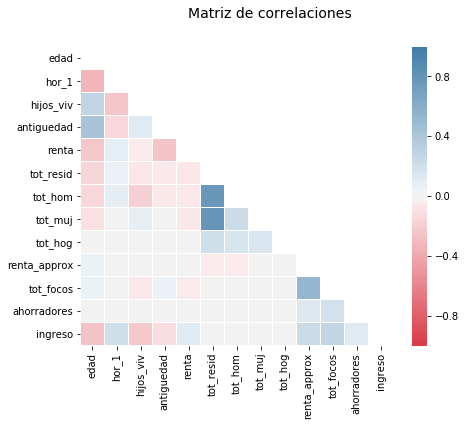

In [31]:
# Correlacion
corr = data.corr()

# plot correlation matrix
fig = plt.figure(figsize=(7, 5.5))
mask = np.zeros_like(corr, dtype=np.bool) # create mask to cover the upper triangle
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 240, as_cmap=True)
sns.heatmap(corr, annot=False, mask=mask, vmin = -1.0, vmax = 1.0,linewidths=0.1, cmap = cmap)
fig.suptitle('Matriz de correlaciones', fontsize=14)
#plt.savefig('graphs/correlaciones.png', dpi = 300)

In [23]:
len(data.columns)

13

In [32]:
#Estandarizar datos
for col in data.columns[:-1]:
    mu = np.mean(data[col])
    sigma = np.std(data[col])
    data[col] = data[col].apply(lambda x: (x-mu)/sigma)

In [33]:
# Obtenemos el conjunto de train y test (80/20)
train, test = train_test_split(data, test_size = 0.2, random_state = 158999)

In [43]:
# Analisis en componentes principales
pca = PCA(0.85)
X_train = pca.fit_transform(train.iloc[:, :-1].values)
#train_labels = train.iloc[:,0].values-1
Var_C = pca.explained_variance_ratio_
C = pca.components_

In [41]:
Var_C

array([0.20683501, 0.14903793, 0.13157471, 0.09671978, 0.08393977,
       0.0817313 , 0.07153404, 0.06462343])

In [42]:
len(Var_C)

8

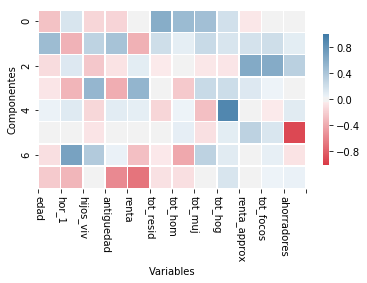

In [44]:
cmap = sns.diverging_palette(10, 240, as_cmap=True)
sns.heatmap(C, cmap=cmap, vmin=-1, vmax=1,
            linewidths=.5, cbar_kws={"shrink": .6}, yticklabels=2,
            square=True)
plt.xticks(range(0,13),list(data.columns[:-1]), rotation=-90)
plt.xlabel("Variables")
plt.ylabel("Componentes")
#plt.savefig('graphs/var_en_comp.png', dpi = 300)
plt.show()